# Part 1
## Tiny dataset of various users

In [122]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
df = pl.read_parquet('results-without-quotes.parquet')
df

model,author,source,care,fairness,loyalty,authority,sanctity,liberty
str,str,str,f64,f64,f64,f64,f64,f64
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-5.0,6.0,7.0,7.0,3.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-4.0,6.0,7.0,6.0,5.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-6.0,7.0,6.0,5.0,4.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-7.0,-3.0,6.0,4.0,3.0,2.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-6.0,7.0,6.0,7.0,7.0
…,…,…,…,…,…,…,…,…
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…",0.0,0.0,0.0,2.0,0.0,-1.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…",0.0,0.0,0.0,2.0,0.0,-2.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…",0.0,0.0,-2.0,5.0,0.0,-5.0


In [172]:
df_with_quotes = pl.read_parquet('results-with-quotes.parquet')

average_disagreement = (
    df_with_quotes.group_by(["quote", "model"])
    .agg([
        pl.col("care").std().alias("avg_care"),
        pl.col("fairness").std().alias("avg_fairness"),
        pl.col("loyalty").std().alias("avg_loyalty"),
        pl.col("authority").std().alias("avg_authority"),
        pl.col("sanctity").std().alias("avg_sanctity"),
        pl.col("liberty").std().alias("avg_liberty")
    ])
)

# Display the result
print("\nAverage Disagreement by Quote and Model:")
print(average_disagreement.sort("avg_care"))


Average Disagreement by Quote and Model:
shape: (534, 8)
┌─────────────────────────────────┬─────────┬──────────┬──────────────┬─────────────┬───────────────┬──────────────┬─────────────┐
│ quote                           ┆ model   ┆ avg_care ┆ avg_fairness ┆ avg_loyalty ┆ avg_authority ┆ avg_sanctity ┆ avg_liberty │
│ ---                             ┆ ---     ┆ ---      ┆ ---          ┆ ---         ┆ ---           ┆ ---          ┆ ---         │
│ str                             ┆ str     ┆ f64      ┆ f64          ┆ f64         ┆ f64           ┆ f64          ┆ f64         │
╞═════════════════════════════════╪═════════╪══════════╪══════════════╪═════════════╪═══════════════╪══════════════╪═════════════╡
│ Automatically disbelieving aut… ┆ llama32 ┆ 0.0      ┆ 3.058945     ┆ 4.309458    ┆ 2.356602      ┆ 4.242641     ┆ 1.581139    │
│  If chihuahuas had long enough… ┆ mistral ┆ 0.0      ┆ 2.415229     ┆ 0.0         ┆ 1.636392      ┆ 0.0          ┆ 1.619328    │
│ I can't replace referen

Sometimes the tweeet was actually quoting something, so instead of including the sentiment of it (positive or negative), just calculate the magnitude

In [173]:
#### OPTIONAL!

# Step 1: Replace values with their absolute values
columns_to_replace = ["care", "fairness", "loyalty", "authority", "sanctity", "liberty"]
# Step 2: Use with_columns to apply abs() function
df_abs = df.with_columns(
    [pl.col(column).abs().alias(column) for column in columns_to_replace]
)
# Step 3: Create the anon and non-anon dataframes separately
# anon_authors = df_abs.filter(pl.col("author").str.contains("-anon"))
# non_anon_authors = df_abs.filter(~pl.col("author").str.contains("-anon"))
anon_authors = df.filter(pl.col("author").str.contains("-anon"))
non_anon_authors = df.filter(~pl.col("author").str.contains("-anon"))

non_anon_authors

model,author,source,care,fairness,loyalty,authority,sanctity,liberty
str,str,str,f64,f64,f64,f64,f64,f64
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-5.0,6.0,7.0,7.0,3.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-4.0,6.0,7.0,6.0,5.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-6.0,7.0,6.0,5.0,4.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-7.0,-3.0,6.0,4.0,3.0,2.0
"""gemma2""","""Donald Trump""","""https://x.com/realDonaldTrump/…",-8.0,-6.0,7.0,6.0,7.0,7.0
…,…,…,…,…,…,…,…,…
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…",0.0,0.0,0.0,2.0,0.0,-1.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…",0.0,0.0,0.0,2.0,0.0,-2.0
"""gpt4o""","""Paul Graham""","""https://x.com/paulg/status/185…",0.0,0.0,-2.0,5.0,0.0,-5.0


In [190]:
summary_df = (
    non_anon_authors.group_by(["model", "author"])
    .agg([
        pl.col("care").mean().alias("mean_care"),
        pl.col("care").std().alias("std_care"),
        pl.col("fairness").mean().alias("mean_fairness"),
        pl.col("fairness").std().alias("std_fairness"),
        pl.col("loyalty").mean().alias("mean_loyalty"),
        pl.col("loyalty").std().alias("std_loyalty"),
        pl.col("authority").mean().alias("mean_authority"),
        pl.col("authority").std().alias("std_authority"),
        pl.col("sanctity").mean().alias("mean_sanctity"),
        pl.col("sanctity").std().alias("std_sanctity"),
        pl.col("liberty").mean().alias("mean_liberty"),
        pl.col("liberty").std().alias("std_liberty")
    ])
)
summary_df.filter(pl.col("author") == "Paul Graham")

model,author,mean_care,std_care,mean_fairness,std_fairness,mean_loyalty,std_loyalty,mean_authority,std_authority,mean_sanctity,std_sanctity,mean_liberty,std_liberty
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""qwen2.5""","""Paul Graham""",-0.61,1.85807,-0.62,0.982473,-0.66,1.551929,1.2,3.104249,-0.01,0.1,0.08,2.695601
"""gpt4o""","""Paul Graham""",0.09,3.333621,-0.32,3.190516,-0.24,2.554932,-0.3,1.839521,-0.34,1.121147,0.24,2.578544
"""llama3.2""","""Paul Graham""",-0.284211,2.668425,-0.1,2.871911,1.144211,3.828385,0.362105,4.346316,0.233684,3.581947,3.210526,4.623931
"""mistral""","""Paul Graham""",0.148936,3.36317,-1.361702,4.604465,-1.329787,5.824288,-1.829787,4.773669,-1.393617,3.819075,0.925532,5.279784
"""gemma2""","""Paul Graham""",1.014085,2.059771,0.225352,1.741897,0.943662,2.817736,-0.15493,1.737386,-0.112676,0.549007,1.239437,2.968717


['llama3.2', 'gemma2', 'qwen2.5', 'gpt4o', 'mistral']
['Bill Gates', 'Donald Trump', 'Donald Tusk', 'Kamala Harris', 'Paul Graham', 'Pope Francis']


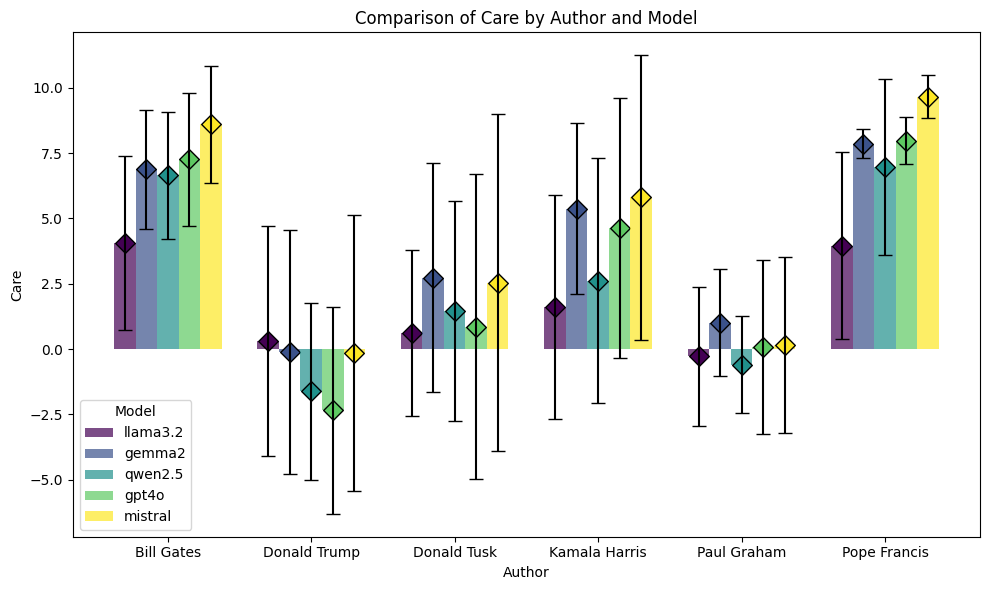

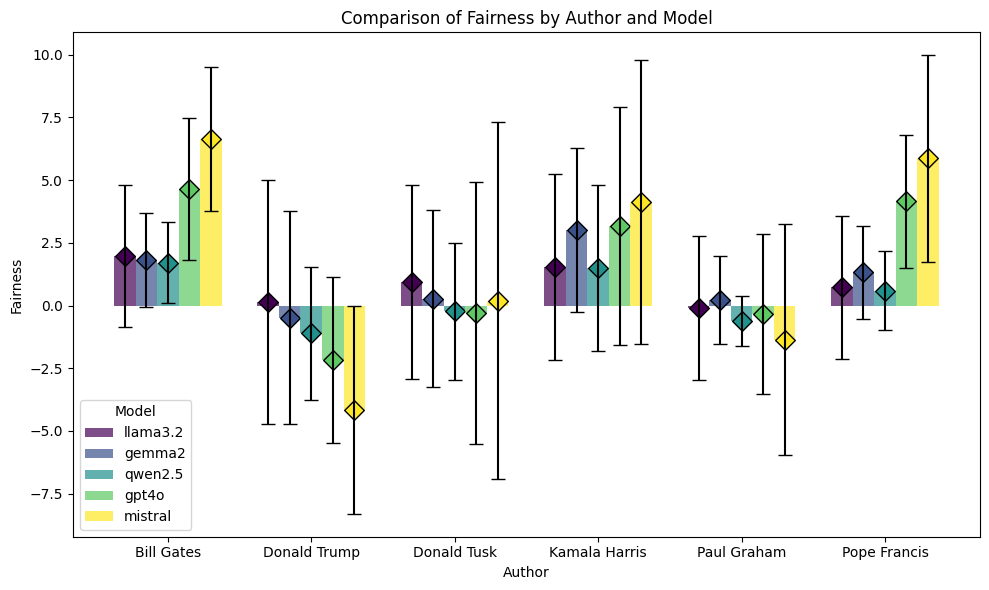

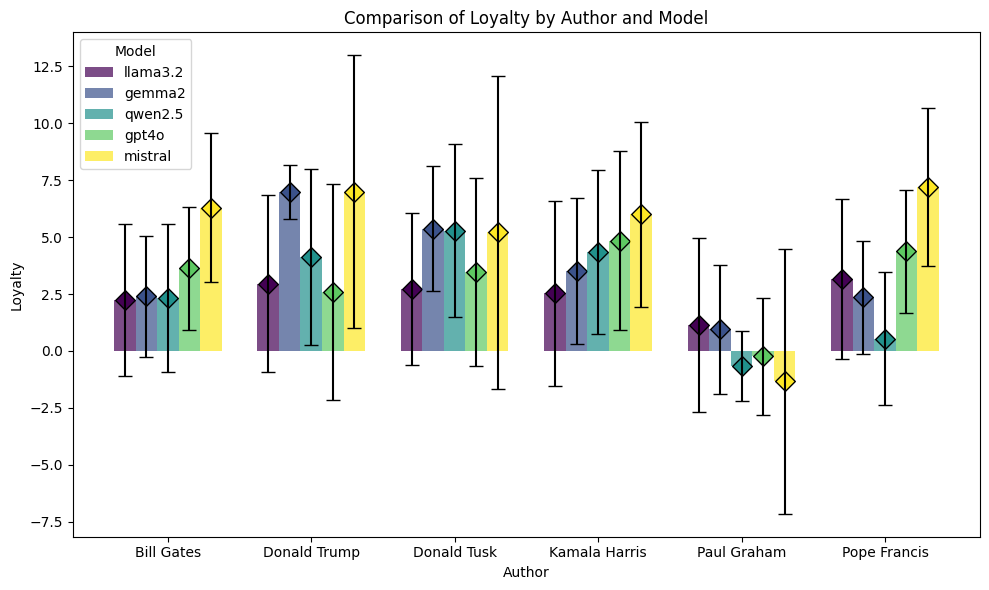

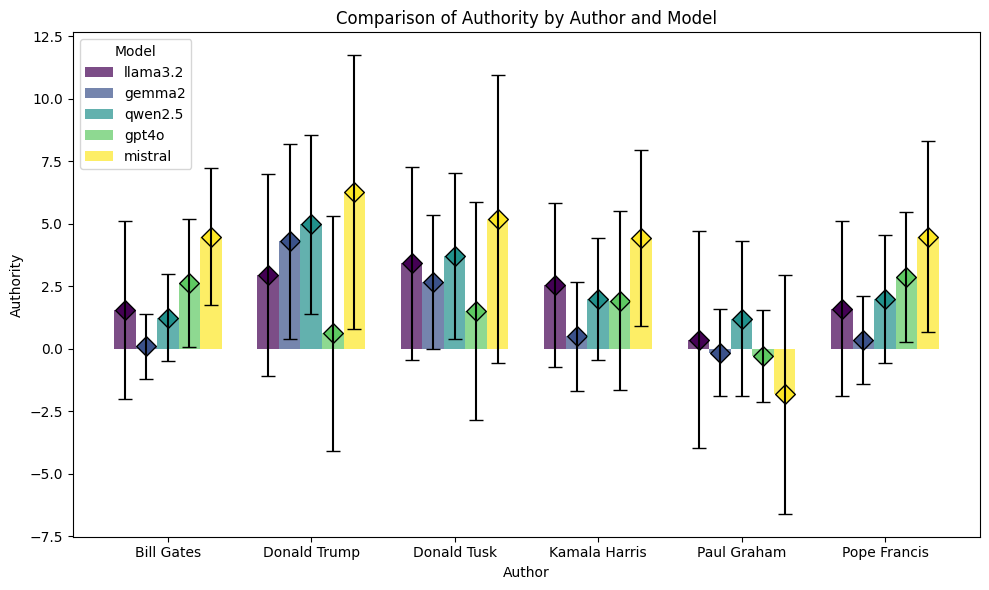

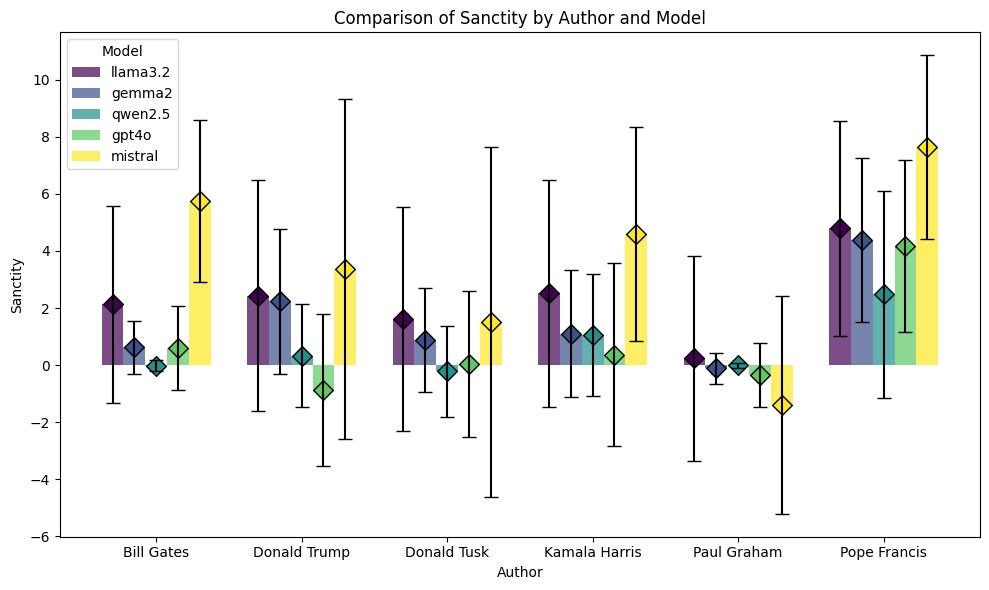

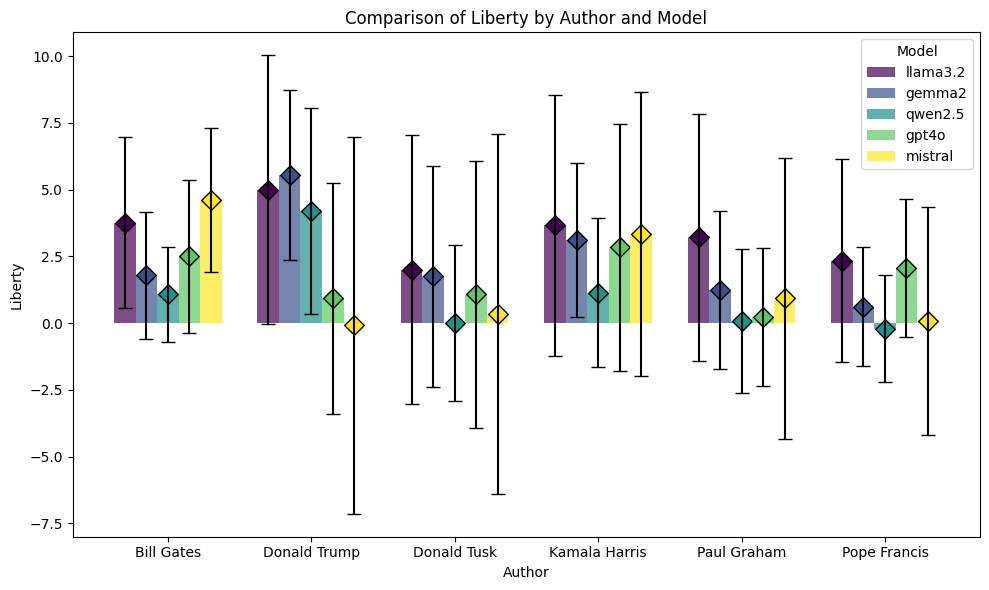

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming summary_df is already defined and contains mean and std columns
bar_width = 0.15  # Width of each bar
x_labels = summary_df["author"].unique().sort()  # Unique authors
ordered_models = list(summary_df["model"].unique())  # Fixed order for models
ordered_authors = list(summary_df.sort("author")["author"].unique().sort())
print(ordered_models)
print(ordered_authors)
num_models = len(ordered_models)  # Number of unique models


# summary_df = summary_df.with_columns(
#     pl.when(pl.col("author") == "Pope Francis")
#       .then(-10)
#       .otherwise(pl.col("mean_care"))
#       .alias("mean_care")
# )

# Create a color mapping for each model
colors = plt.cm.viridis(np.linspace(0, 1, num_models))
model_color_mapping = {model: colors[i] for i, model in enumerate(ordered_models)}
marker_size = 10

# Loop through each foundation column
for foundation in ["care", "fairness", "loyalty", "authority", "sanctity", "liberty"]:
    mean_col = f"mean_{foundation}"
    std_col = f"std_{foundation}"
    
    plt.figure(figsize=(10, 6))
    
    # Iterate over models to plot grouped bars and scatter points with error bars
    for i, model in enumerate(ordered_models):
        # Filter data for the specific model and convert to Pandas DataFrame for compatibility with Matplotlib
        model_data = summary_df.filter(pl.col("model") == model).sort("author").to_pandas()
        
        # Calculate x positions for the current model's bars
        x_pos = np.arange(len(x_labels)) + (i * bar_width)

        # Plot the bars
        plt.bar(x_pos, model_data[mean_col], width=bar_width,
                label=model, alpha=0.7, color=model_color_mapping[model])
        # print(model_data)
        
        # Overlay diamond markers on each bar
        plt.scatter(x_pos, model_data[mean_col], s=marker_size**2, marker="D",
                    color=model_color_mapping[model], edgecolors='black', linewidths=1)
        
        # Add error bars
        plt.errorbar(x_pos, model_data[mean_col], yerr=model_data[std_col],
                     fmt='none', ecolor='black', capsize=5)

    # Adjust x-ticks to align in the center of each grouped set
    plt.xticks(np.arange(len(x_labels)) + (num_models - 1) * bar_width / 2, x_labels)
    
    # Add titles and labels
    plt.title(f'Comparison of {foundation.capitalize()} by Author and Model')
    plt.xlabel('Author')
    plt.ylabel(foundation.capitalize())
    plt.legend(title='Model')
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


# Part 2
## Does anonymization make any impact?

In [204]:
# Step 1: Separate regular authors and anon authors
regular_authors = df.filter(~pl.col("author").str.contains("-anon"))
anon_authors = df.filter(pl.col("author").str.contains("-anon"))

# Step 2: Calculate means for each author type
regular_means = (
    regular_authors.group_by("author","model")
    .agg([
        pl.col("care").mean().alias("mean_care"),
        pl.col("fairness").mean().alias("mean_fairness"),
        pl.col("loyalty").mean().alias("mean_loyalty"),
        pl.col("authority").mean().alias("mean_authority"),
        pl.col("sanctity").mean().alias("mean_sanctity"),
        pl.col("liberty").mean().alias("mean_liberty")
    ])
)

anon_means = (
    anon_authors.group_by(pl.col("author").str.replace("-anon", ""),pl.col("model")).agg([
        pl.col("care").mean().alias("mean_care"),
        pl.col("fairness").mean().alias("mean_fairness"),
        pl.col("loyalty").mean().alias("mean_loyalty"),
        pl.col("authority").mean().alias("mean_authority"),
        pl.col("sanctity").mean().alias("mean_sanctity"),
        pl.col("liberty").mean().alias("mean_liberty")
    ])
)

# Step 3: Merge results for comparison
comparison_df = regular_means.join(anon_means, on=["author","model"], suffix="_anon")

# Display comparison results
print("\nComparison of Regular and Anon Authors:")
comparison_df.head(2)


Comparison of Regular and Anon Authors:


author,model,mean_care,mean_fairness,mean_loyalty,mean_authority,mean_sanctity,mean_liberty,mean_care_anon,mean_fairness_anon,mean_loyalty_anon,mean_authority_anon,mean_sanctity_anon,mean_liberty_anon
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""Pope Francis""","""qwen2.5""",6.959596,0.59596,0.545455,1.979798,2.484848,-0.212121,6.2,0.07,0.66,1.43,1.91,0.29
"""Paul Graham""","""llama3.2""",-0.284211,-0.1,1.144211,0.362105,0.233684,3.210526,-0.147619,0.157143,0.870238,0.555294,0.575,1.761905


C:\Users\pmm-workstation\AppData\Local\Temp\ipykernel_37004\1830090502.py:15: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  df_melted = df_diff.melt(


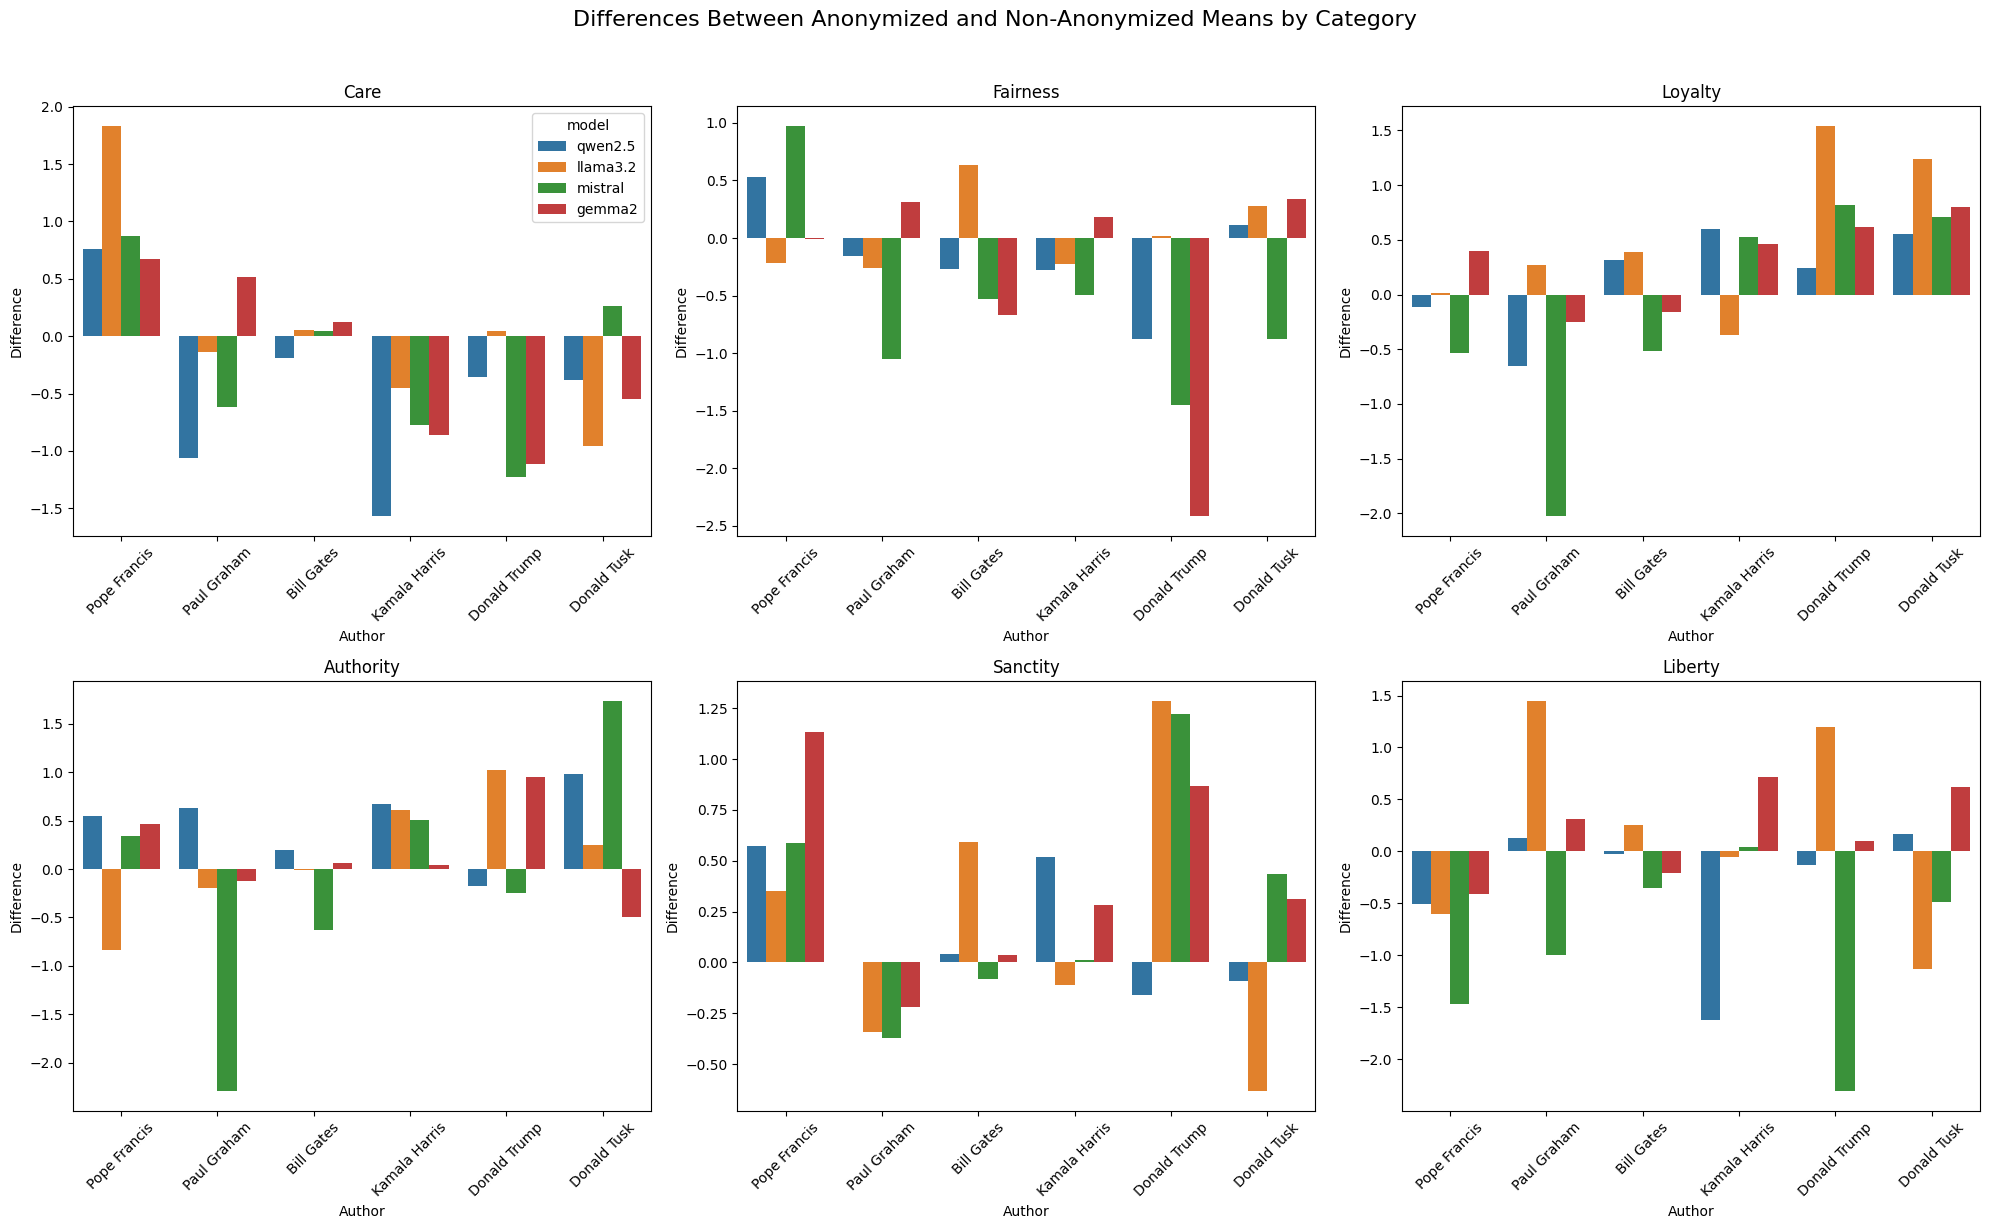

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

# First create the differences as before
df_diff = comparison_df.with_columns([
    (pl.col("mean_care") - pl.col("mean_care_anon")).alias("care_diff"),
    (pl.col("mean_fairness") - pl.col("mean_fairness_anon")).alias("fairness_diff"),
    (pl.col("mean_loyalty") - pl.col("mean_loyalty_anon")).alias("loyalty_diff"),
    (pl.col("mean_authority") - pl.col("mean_authority_anon")).alias("authority_diff"),
    (pl.col("mean_sanctity") - pl.col("mean_sanctity_anon")).alias("sanctity_diff"),
    (pl.col("mean_liberty") - pl.col("mean_liberty_anon")).alias("liberty_diff"),
])

df_melted = df_diff.melt(
    id_vars=["model", "author"],
    value_vars=["care_diff", "fairness_diff", "loyalty_diff", "authority_diff", "sanctity_diff", "liberty_diff"],
    variable_name="category",
    value_name="difference"
)

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Differences Between Anonymized and Non-Anonymized Means by Category', fontsize=16, y=1.02)

# Map the categories to more readable names
category_names = {
    "care_diff": "Care",
    "fairness_diff": "Fairness",
    "loyalty_diff": "Loyalty",
    "authority_diff": "Authority",
    "sanctity_diff": "Sanctity",
    "liberty_diff": "Liberty"
}

# Create individual plots for each category
for idx, (category, ax) in enumerate(zip(category_names.keys(), axes.flat)):
    # Filter data for this category
    category_data = df_melted.filter(pl.col("category") == category)
    
    # Create the bar plot
    sns.barplot(data=category_data, x="author", y="difference", hue="model", ax=ax)
    
    # Customize the subplot
    ax.set_title(category_names[category])
    ax.set_xlabel('Author')
    ax.set_ylabel('Difference')
    ax.tick_params(axis='x', rotation=45)
    
    # Only show legend for the first subplot
    if idx != 0:
        ax.get_legend().remove()

# Adjust the layout
plt.tight_layout()
plt.show()

# Part 3 
## What if dataset is larger?

Here, we use a selection of 1k random tweets of Donald Trump, which were not retweets or quotations and were longer than 100 characters, pulled from https://www.thetrumparchive.com/faq

In [65]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
trump_df = pl.read_parquet('trump-1k-noquotes.parquet')
trump_df

model,author,source,care,fairness,loyalty,authority,sanctity,liberty
str,str,str,f64,f64,f64,f64,f64,f64
"""llama3.2""","""Donald Trump""","""935844881825763328""",0.0,2.0,0.0,-3.0,6.0,-4.0
"""llama3.2""","""Donald Trump""","""1168882690713690112""",-4.0,3.0,-6.0,-8.0,-1.0,2.0
"""llama3.2""","""Donald Trump""","""982750459877380096""",2.0,-1.0,4.0,-3.0,6.0,-5.0
"""llama3.2""","""Donald Trump""","""270563424109481986""",-1.67,-2.33,-3.23,5.67,2.45,6.45
"""llama3.2""","""Donald Trump""","""357568979855884288""",-5.0,2.0,-8.0,10.0,4.0,8.0
…,…,…,…,…,…,…,…,…
"""qwen2.5""","""Donald Trump""","""1196147508445163520""",2.0,-6.0,3.0,-7.0,0.0,4.0
"""qwen2.5""","""Donald Trump""","""375365520964337664""",0.0,0.0,-2.0,-3.0,0.0,0.0
"""qwen2.5""","""Donald Trump""","""890935044474380288""",2.0,0.0,0.0,3.0,0.0,0.0


In [200]:
trump_summary_df = (
    trump_df.group_by(["model","author"])
    .agg([
        pl.col("care").mean().alias("mean_care"),
        pl.col("care").std().alias("std_care"),
        pl.col("fairness").mean().alias("mean_fairness"),
        pl.col("fairness").std().alias("std_fairness"),
        pl.col("loyalty").mean().alias("mean_loyalty"),
        pl.col("loyalty").std().alias("std_loyalty"),
        pl.col("authority").mean().alias("mean_authority"),
        pl.col("authority").std().alias("std_authority"),
        pl.col("sanctity").mean().alias("mean_sanctity"),
        pl.col("sanctity").std().alias("std_sanctity"),
        pl.col("liberty").mean().alias("mean_liberty"),
        pl.col("liberty").std().alias("std_liberty")
    ])
)
trump_summary_df = trump_summary_df.with_columns(
    pl.lit("Donald Trump - 1k tweets")
    .alias("author")
)
trump_summary_df = trump_summary_df.vstack(summary_df.filter(pl.col("author") == "Donald Trump"))
# Remove gpt4o for comparison
trump_summary_df = trump_summary_df.filter(pl.col("model") != "gpt4o")
trump_summary_df.head(2)

model,author,mean_care,std_care,mean_fairness,std_fairness,mean_loyalty,std_loyalty,mean_authority,std_authority,mean_sanctity,std_sanctity,mean_liberty,std_liberty
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""qwen2.5""","""Donald Trump - 1k tweets""",0.193,2.298921,-0.278,2.480094,1.865,4.066609,2.375,3.873419,0.098,0.73002,0.9,2.196548
"""llama3.2""","""Donald Trump - 1k tweets""",-0.28495,3.403883,1.322065,4.043332,2.422692,4.254343,2.250155,4.912843,1.662595,3.991909,2.824935,5.405298


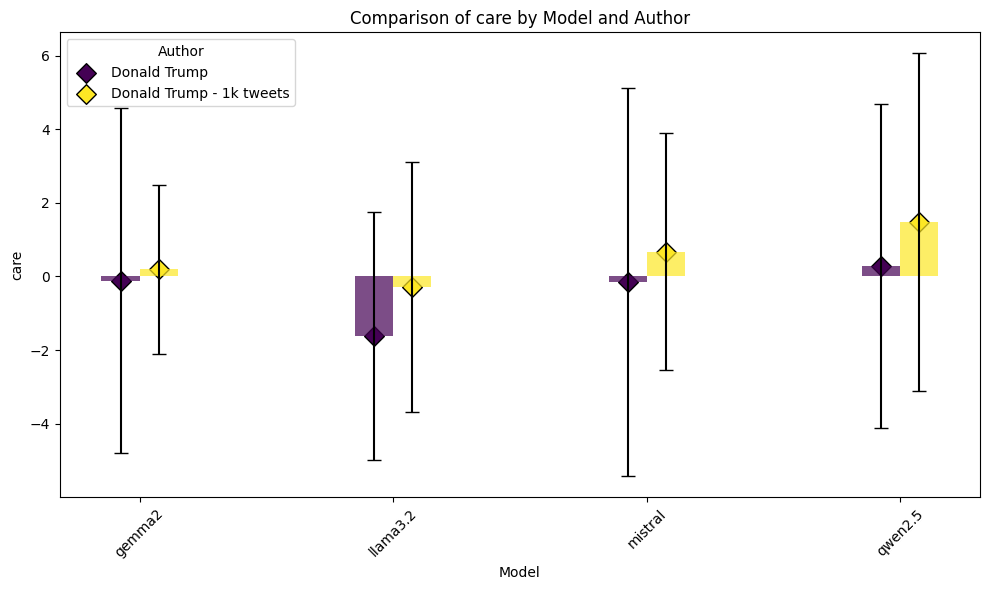

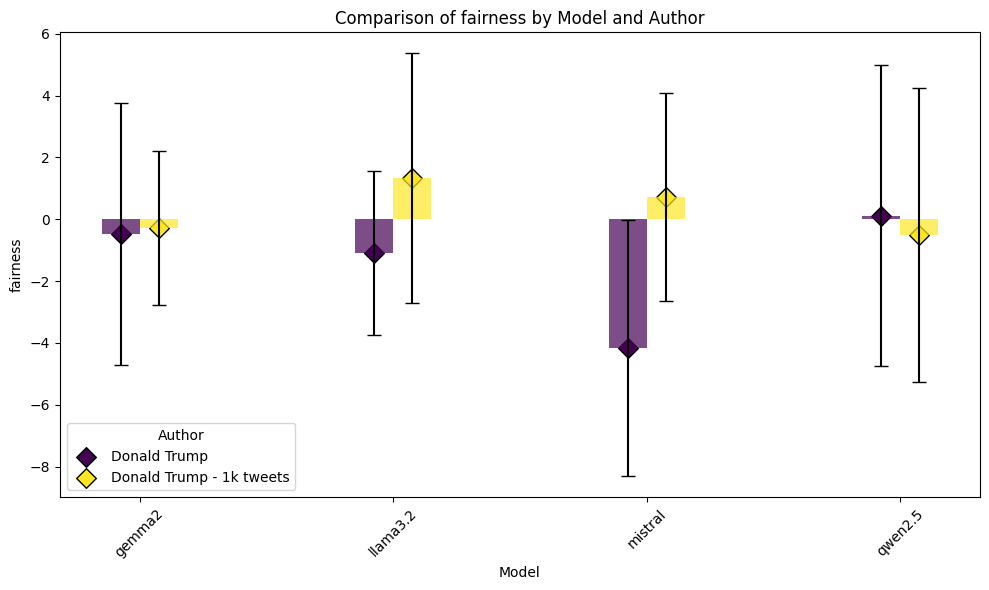

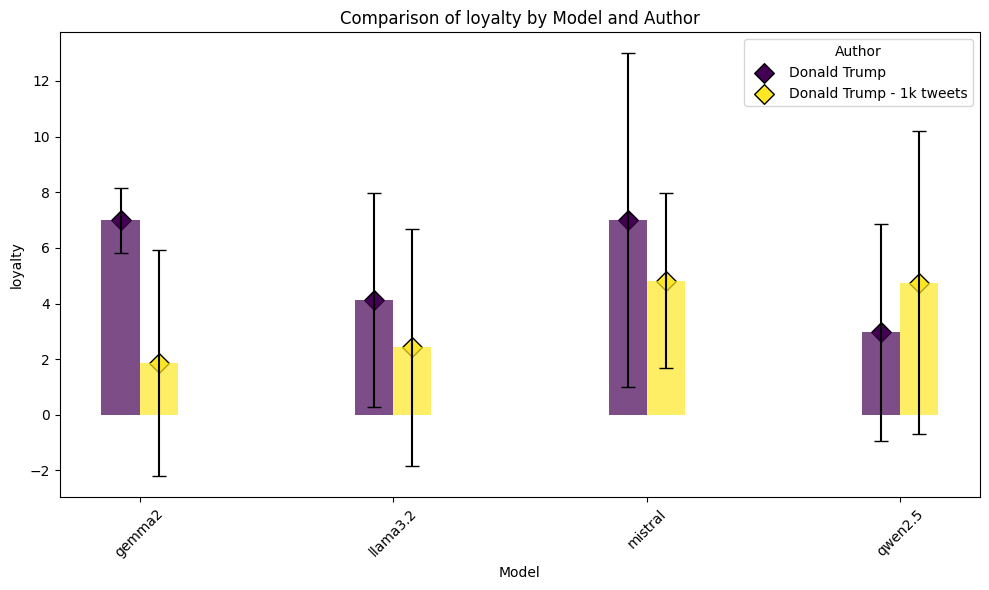

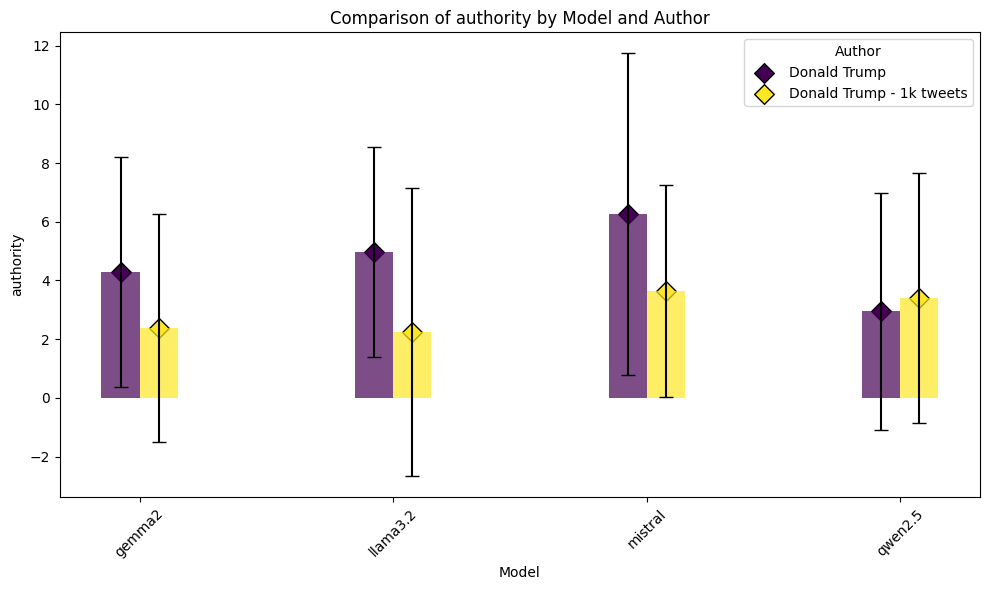

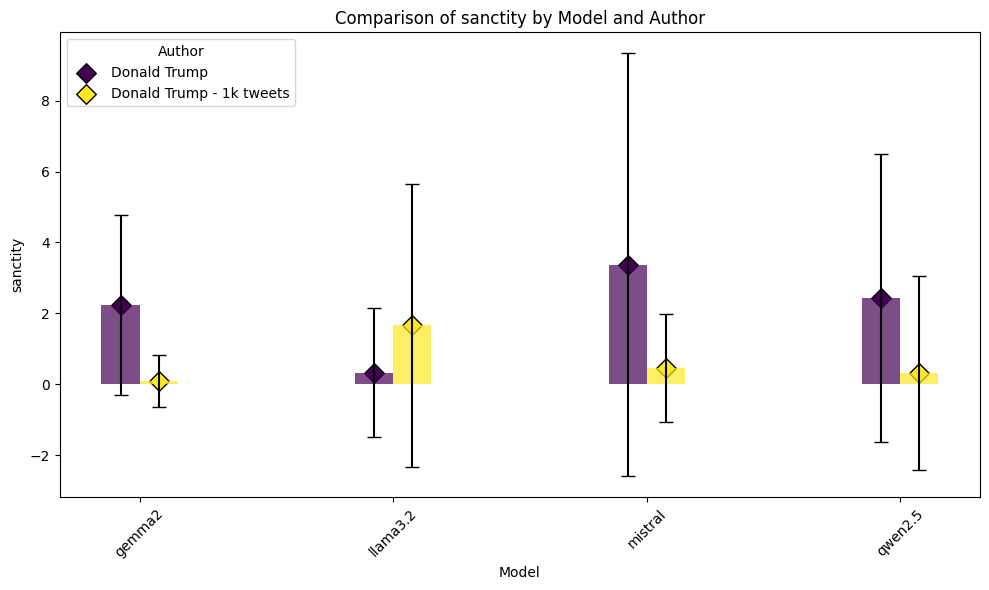

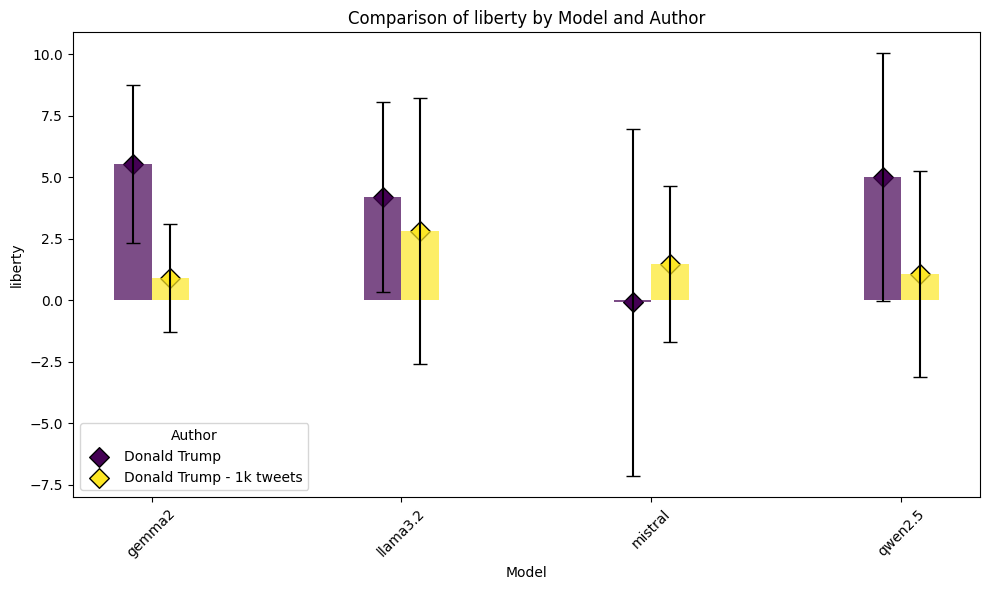

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

# Assuming trump_summary_df is already defined
bar_width = 0.15  # Width of each bar
x_labels = trump_summary_df["model"].unique().sort()  # Unique models
# Define a fixed order for authors based on their appearance or any desired order
ordered_authors = list(trump_summary_df.sort("author")["author"].unique().sort()) # You can customize this list if needed
num_authors = len(ordered_authors)  # Number of unique authors
# Create a mapping of authors to colors
colors = plt.cm.viridis(np.linspace(0, 1, num_authors))
author_color_mapping = {author: colors[i] for i, author in enumerate(ordered_authors)}
marker_size = 10  # Adjust this value for larger or smaller markers

for column in ["mean_care", "mean_fairness", "mean_loyalty", "mean_authority", "mean_sanctity", "mean_liberty"]:
    plt.figure(figsize=(10, 6))
    
    for i, author in enumerate(ordered_authors):
        author_data = trump_summary_df.filter(pl.col("author") == author).to_pandas()  # Convert to Pandas DataFrame for easier plotting
        
        # Calculate x positions for each author's diamonds
        x_pos = np.arange(len(x_labels)) + (i * bar_width)
        
        # Plot diamonds with error bars using the fixed color mapping
        plt.scatter(x_pos, author_data[column], s=marker_size**2, marker="D", color=author_color_mapping[author], edgecolors='black', linewidths=1)
        plt.bar(x_pos, author_data[column], width=bar_width, label=model, alpha=0.7, color=author_color_mapping[author])
        plt.errorbar(x_pos, author_data[column], yerr=author_data[column.replace('mean', 'std')], fmt='none', ecolor='black', capsize=5)
    
    # Adjust x-ticks and labels
    plt.xticks(np.arange(len(x_labels)) + (num_authors - 1) * bar_width / 2, x_labels, rotation=45)
    
    plt.title(f'Comparison of {column.replace("mean_", "")} by Model and Author')
    plt.xlabel('Model')
    plt.ylabel(column.replace('mean_', ''))
    plt.legend(ordered_authors, title='Author')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()